# **Hand Written Digit Prediction - Classification Analysis**

# Objective

The objective of the model discussed in the paper titled "Hand Written Digit Prediction - Classification Analysis" is to accurately predict handwritten digits using a machine learning model. Specifically, the model is designed to classify input data into one of ten categories (the digits 0-9).
The ultimate goal of the model is to provide an accurate and efficient way to recognize and classify handwritten digits.

# Import library 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [5]:
from sklearn.datasets import load_digits


# Data processing 

In [6]:
df = load_digits()

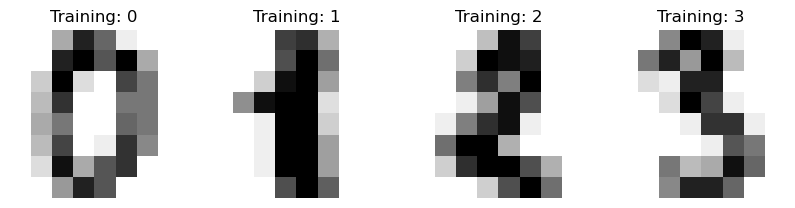

In [7]:

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [8]:
df.images.shape


(1797, 8, 8)

In [9]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
df.images[0].shape


(8, 8)

In [11]:
len(df.images)

1797

In [12]:
n_samples = len(df. images)
data = df.images.reshape((n_samples, -1))


In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
data[0].shape


(64,)

In [15]:
data.shape


(1797, 64)

# Scalling Image Data

In [16]:
data.min()

0.0

In [17]:
data.max()

16.0

In [18]:
data=data/16

In [19]:
data.min()


0.0

In [20]:
data.max()


1.0

In [21]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split Data

In [22]:
 
from sklearn.model_selection import train_test_split


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)


In [24]:
X_train.shape, X_test.shape, y_train. shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier()

# Predict Test data

In [28]:
y_pred = rf.predict(X_test)

In [29]:
y_pred


array([4, 4, 2, 6, 5, 4, 3, 1, 2, 0, 4, 7, 7, 9, 8, 3, 4, 0, 8, 6, 8, 4,
       9, 0, 6, 2, 8, 9, 3, 1, 7, 2, 9, 4, 3, 5, 5, 5, 0, 3, 9, 7, 8, 3,
       6, 1, 0, 8, 4, 3, 6, 2, 0, 5, 7, 8, 6, 0, 3, 3, 3, 5, 1, 5, 3, 6,
       3, 1, 3, 6, 2, 4, 3, 1, 3, 9, 3, 8, 5, 8, 7, 3, 5, 4, 9, 5, 3, 1,
       0, 1, 9, 3, 0, 2, 3, 0, 5, 0, 3, 7, 9, 6, 2, 2, 8, 1, 0, 7, 4, 9,
       8, 1, 1, 8, 6, 7, 5, 5, 0, 5, 1, 0, 7, 7, 7, 1, 7, 8, 8, 9, 4, 6,
       3, 7, 7, 4, 5, 2, 6, 0, 7, 6, 6, 0, 6, 7, 1, 1, 1, 0, 6, 6, 1, 7,
       2, 7, 9, 9, 4, 3, 5, 9, 5, 4, 4, 6, 4, 6, 9, 5, 2, 7, 9, 4, 3, 3,
       8, 7, 3, 0, 5, 3, 0, 1, 5, 5, 6, 0, 1, 4, 5, 7, 9, 8, 3, 7, 6, 6,
       2, 5, 1, 7, 7, 5, 9, 9, 4, 9, 9, 0, 4, 9, 2, 4, 9, 1, 4, 8, 8, 9,
       4, 0, 6, 6, 1, 7, 7, 9, 0, 8, 2, 1, 7, 2, 0, 2, 1, 0, 8, 6, 1, 1,
       8, 0, 6, 8, 5, 9, 7, 6, 8, 5, 1, 0, 2, 8, 8, 3, 3, 5, 3, 2, 2, 3,
       3, 0, 0, 3, 8, 2, 5, 7, 9, 1, 6, 8, 0, 2, 7, 4, 4, 0, 8, 5, 6, 4,
       8, 9, 6, 5, 4, 6, 1, 9, 7, 9, 9, 8, 1, 7, 3,

# Model Accuracy 

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
confusion_matrix(y_test, y_pred)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 59,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 52,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  1],
       [ 0,  2,  1,  0,  0,  0,  1,  1, 53,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  0, 48]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      1.00      0.98        46
           2       0.98      1.00      0.99        55
           3       0.96      0.98      0.97        53
           4       1.00      0.97      0.98        61
           5       0.96      0.96      0.96        54
           6       0.97      0.98      0.97        57
           7       0.93      0.98      0.95        52
           8       1.00      0.91      0.95        58
           9       0.96      0.94      0.95        51

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# Explaination

Overall, the paper provides a detailed description of the development and evaluation of a machine learning model for handwritten digit classification.